## Modules
Needed to use non-Python functionalities already programmed by someone else.

In [1]:
# Used to cast the polygons into np.arrays and afterwards transpose them easily with the .T function
import numpy as np
import matplotlib.pyplot as plt    # to plot the counties
# Used to determine which part of the plot should be saved
from matplotlib.transforms import Bbox

# To add a colorbar to the plot of the matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Used to navigate the directories and check for files
import os
# backup directory of this file, because the working directory is changed to save files
cor_mx_by_pop_density_directory = os.getcwd()

## Get the Data
Read the file ["Readme.ipynb"](Readme.ipynb) or check out the files ["get_data.ipynb"](get_data.ipynb) and ["get_geographical_data_of_german_counties.ipynb"](get_geographical_data_of_german_counties.ipynb) for more information about the data collection.

In [2]:
os.chdir(".."), os.chdir("..")   # move two directories up
%run color_scheme.ipynb
os.chdir("collect_data")
%run get_data.ipynb
os.chdir(cor_mx_by_pop_density_directory)    # return to original directory

Polished county data from file is ready to go!
Polished covid19 data from file is ready to go!


## Function to calculate the probability of correlations between two arrays

In [3]:
def sort_AdmUnitIDs_by_population_density():
    county_by_population_density = dict()
    for AdmUnitID, county in counties_geography.items():
        if county['population_density'] in county_by_population_density.keys():
            raise Exception("The population density " + str(county['population_density']) +
                            "seems to be related to two counties")
        else:
            county_by_population_density[county['population_density']] = AdmUnitID
    pop_densitys = list(county_by_population_density.keys())
    pop_densitys.sort()
    return [county_by_population_density[e] for e in pop_densitys]

In [4]:
# AdmUnitIds = list(covid19.keys())
AdmUnitIds = sort_AdmUnitIDs_by_population_density()

In [5]:
AdmUnitIds

['12070',
 '15081',
 '12073',
 '12068',
 '3354',
 '13076',
 '15090',
 '13071',
 '12062',
 '15086',
 '7232',
 '13075',
 '13072',
 '3360',
 '15091',
 '9374',
 '9377',
 '7233',
 '16069',
 '12071',
 '16075',
 '13073',
 '16065',
 '15083',
 '6535',
 '13074',
 '3358',
 '12061',
 '9673',
 '12067',
 '3357',
 '9276',
 '1054',
 '9272',
 '9575',
 '12072',
 '9472',
 '9371',
 '12069',
 '9372',
 '9278',
 '6635',
 '16068',
 '3462',
 '3256',
 '9180',
 '9674',
 '7135',
 '12066',
 '12064',
 '9672',
 '16063',
 '15087',
 '1051',
 '9571',
 '12063',
 '9277',
 '9677',
 '3352',
 '7231',
 '14730',
 '9577',
 '6636',
 '7340',
 '16073',
 '9373',
 '1059',
 '15085',
 '9376',
 '9777',
 '3255',
 '8128',
 '16074',
 '9780',
 '16071',
 '9476',
 '16066',
 '7140',
 '7134',
 '3155',
 '16064',
 '9779',
 '9475',
 '16061',
 '3461',
 '15082',
 '8437',
 '9477',
 '3251',
 '9176',
 '6632',
 '9279',
 '3151',
 '3454',
 '16076',
 '9173',
 '9182',
 '9273',
 '3351',
 '9189',
 '6634',
 '16062',
 '5762',
 '7333',
 '12065',
 '9778',
 '927

In [6]:
def get_correlation_matrix(get_max_correlation_not_sum = True, max_shift = 50):
    correlation_matrix = [[0 for c2 in range(len(AdmUnitIds))]
                          for c1 in range(len(AdmUnitIds))]
    for AdmUnitId in AdmUnitIds:
        for second_AdmUnitId in AdmUnitIds:
            i1, i2 = (AdmUnitIds.index(AdmUnitId), AdmUnitIds.index(second_AdmUnitId))
            # if AdmUnitId1 == AdmUnitId2: continue
            if (correlation_matrix[i1][i2] != 0): continue    # Already set
            correlation = covid19[AdmUnitId]["correlation"][second_AdmUnitId]
            offset = max_shift + 1
            while get_max_correlation_not_sum and abs(offset) > max_shift:
                # get the shift with the highest correlation probability
                offset = non_county_specific_data[
                    "correlation_position_array2_to_array1"][np.argmax(correlation)]
                correlation[np.argmax(correlation)] = 0
            if not(get_max_correlation_not_sum):    # sum up all probabilities
                lc = len(correlation)//2
                if (len(correlation[:lc]) != len(correlation[lc+1:])):
                    raise Exception("Len(correlation) not correct)")
                if (len(correlation[lc-max_shift:lc]) !=
                    len(correlation[lc:lc+max_shift])):
                    raise Exception("Len(correlation) aslökdfjaslö")
                offset = (-sum(correlation[lc-max_shift:lc]) +
                          sum(correlation[lc:lc+max_shift]))
            correlation_matrix[i1][i2] = offset
            correlation_matrix[i2][i1] = -offset
    return correlation_matrix

In [7]:
correlation_matrizes = list()
matrix_configurations = [(False, 14), (True, 14), (False, 30),
                         (True, 30), (False, 50), (True, 50)]
for config in matrix_configurations:
    correlation_matrizes.append(get_correlation_matrix(config[0], config[1]))

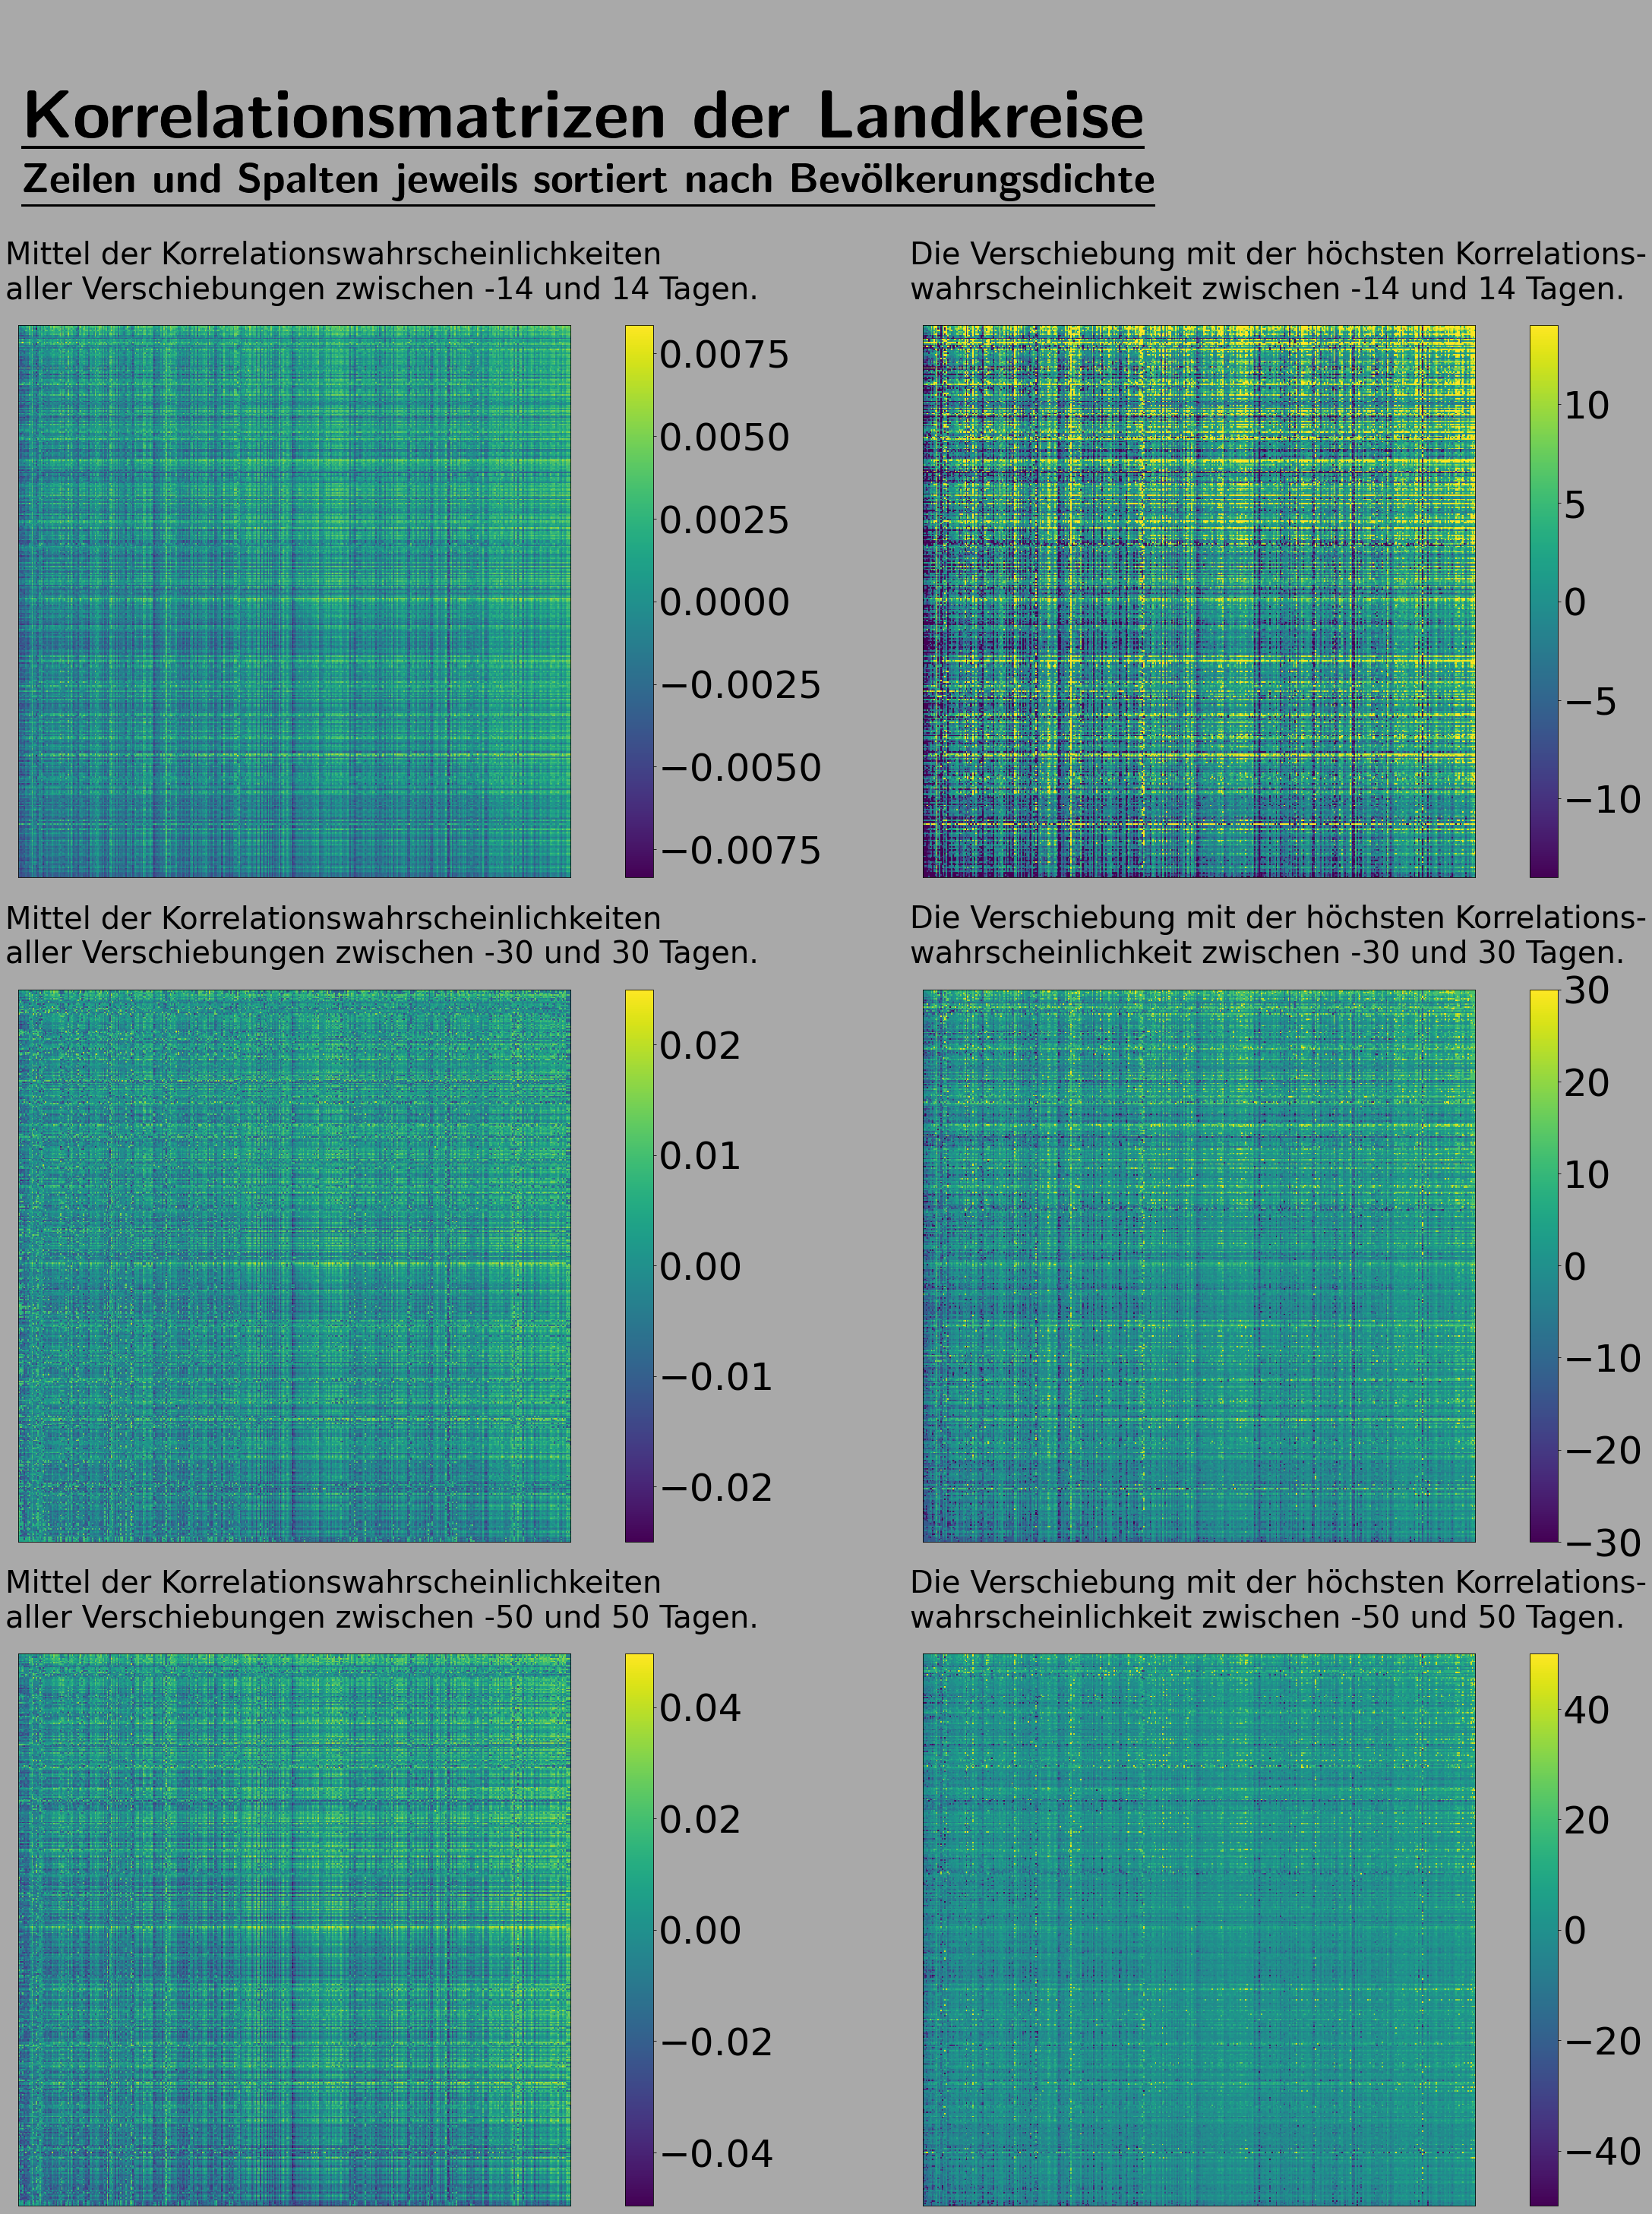

In [19]:
fig, ax = plt.subplots(3, 2, figsize = (35, 40), facecolor='darkgrey')

ax[0][0].text(2,-200," ", fontsize=90)
ax[0][0].text(2,-140,r'\textbf{\underline{Korrelationsmatrizen der Landkreise}}',
              fontsize=90, usetex=True)
ax[0][0].text(2,-100,r'\textbf{\underline{Zeilen und Spalten jeweils sortiert nach Bevölkerungsdichte}}',
              fontsize=55, usetex=True)

i = 0
for correlation_matrix in correlation_matrizes:
    axis = ax[i//2][i%2]
    im1 = axis.matshow(correlation_matrix, interpolation='None')
    if matrix_configurations[i][0]:
        shift = str(matrix_configurations[i][1])
        axis.text(-10,-20,"Die Verschiebung mit der höchsten Korrelations-\n" +
                        "wahrscheinlichkeit zwischen -"+shift+" und "+shift+" Tagen.",
                        fontsize=40)
    else:
        shift = str(matrix_configurations[i][1])
        axis.text(-10,-20,"Mittel der Korrelationswahrscheinlichkeiten\n" +
                       "aller Verschiebungen zwischen -"+shift+" und "+shift+" Tagen.",
                       fontsize=40)
    divider = make_axes_locatable(axis)
    cax = divider.append_axes('right', size='5%', pad=1)
    axis.axes.get_xaxis().set_visible(False)
    axis.axes.get_yaxis().set_visible(False)
    cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
    cbar.ax.tick_params(labelsize=50)
    i+=1

os.chdir(".."), os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
fig.tight_layout(w_pad=-60)
plt.savefig("results/matrizes_pop_density_counties.png")
os.chdir(cor_mx_by_pop_density_directory)    # return to original directory

## Germany with average shift with highest probability

In [9]:
average_correlations = dict()
for row_index in range(len(correlation_matrizes[-1])):
    row = correlation_matrizes[-1][row_index]
    AdmUnitID = AdmUnitIds[row_index]
    # Because the row represents the shift of the second
    # county relative to the first, ralated to this row,
    # we need to take minus to get the average shift of the county
    # relative to all others
    average_correlations[AdmUnitID]=-(sum(row)/len(row))

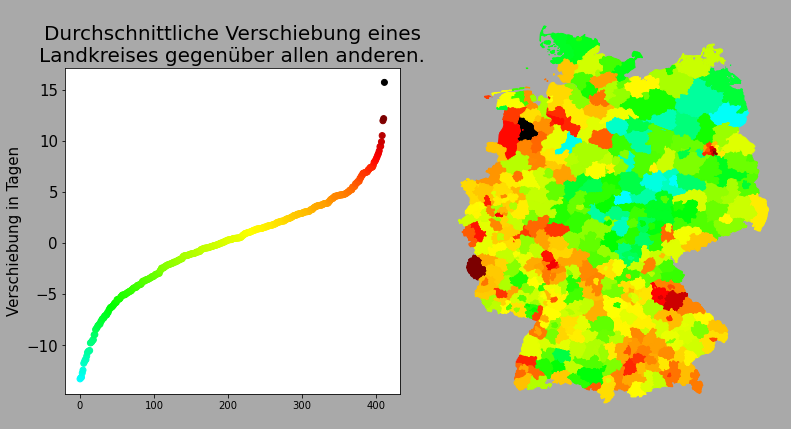

In [10]:
plt.figure(figsize=(6, 6), facecolor='darkgrey')    # enlarge plot
average_correlations_copy = list(average_correlations.values()).copy()
average_correlations_copy.sort()

plt.title("Durchschnittliche Verschiebung eines\nLandkreises gegenüber allen anderen.",
         fontsize=20)
plt.ylabel("Verschiebung in Tagen", fontsize=15)
plt.yticks(fontsize=15)

colors = list()
for avg_correlation in average_correlations_copy:
    colors.append(color_scheme(avg_correlation, average_correlations_copy))
plt.scatter([i for i in range(len(average_correlations_copy))],
            average_correlations_copy, color=colors)



ax = plt.axes([1, 0.06, 0.79, 0.96], frameon=False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_facecolor('darkgrey')
for AdmUnitId, correlation in average_correlations.items():
    for polygon in counties_geography[AdmUnitId]['geometry']:
        x,y = np.array(polygon).T
        plt.fill(x, y,
                 color=color_scheme(correlation, average_correlations_copy))


os.chdir(".."), os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
plt.savefig("results/average_shift_counties.png",
            facecolor="darkgrey", bbox_inches=Bbox([[-0.7,0.45],[10.7,6]]))
os.chdir(cor_mx_by_pop_density_directory)    # return to original directory

## Germany with probabiility how sure a county is behind

In [11]:
average_correlations = dict()
for row_index in range(len(correlation_matrizes[4])):
    row = correlation_matrizes[4][row_index]
    AdmUnitID = AdmUnitIds[row_index]
    # Because the row represents the shift of the second
    # county relative to the first, ralated to this row,
    # we need to take minus to get the average shift of the county
    # relative to all others
    average_correlations[AdmUnitID]=-(sum(row)/len(row))

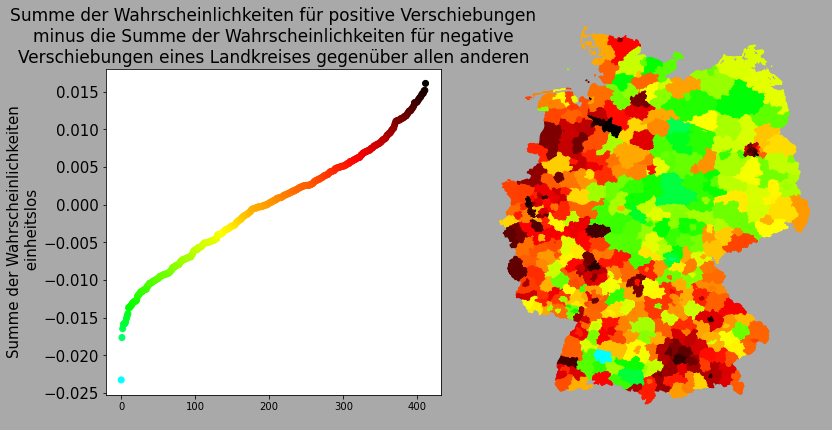

In [12]:
plt.figure(figsize=(6, 6), facecolor='darkgrey')    # enlarge plot
average_correlations_copy = list(average_correlations.values()).copy()
average_correlations_copy.sort()


plt.title("Summe der Wahrscheinlichkeiten für positive Verschiebungen\n"
          "minus die Summe der Wahrscheinlichkeiten für negative\nVerschiebungen "
          "eines Landkreises gegenüber allen anderen", fontsize=17)
plt.ylabel("Summe der Wahrscheinlichkeiten\n einheitslos", fontsize=15)
plt.yticks(fontsize=15)

colors = list()
for avg_correlation in average_correlations_copy:
    colors.append(color_scheme(avg_correlation, average_correlations_copy))
plt.scatter([i for i in range(len(average_correlations_copy))],
            average_correlations_copy, color=colors)


ax = plt.axes([1, 0.06, 0.79, 0.96], frameon=False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_facecolor('darkgrey')
for AdmUnitId, correlation in average_correlations.items():
    for polygon in counties_geography[AdmUnitId]['geometry']:
        x,y = np.array(polygon).T
        plt.fill(x, y,
                 color=color_scheme(correlation, average_correlations_copy))

os.chdir(".."), os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
plt.savefig("results/positive_or_negative_shift_counties.png",
            facecolor="darkgrey", bbox_inches=Bbox([[-0.9,0.45],[10.7,6.2]]))
os.chdir(cor_mx_by_pop_density_directory)    # return to original directory